# CS-430 - Final Project - The Ultimate Halloween Candy - *Chocolate or Not?*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/candy-data.csv')

In [3]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [7]:
data=data.drop(data[['competitorname']],axis=1)

###Splitting the data into X and y

In [8]:
X=data.drop('chocolate',axis=1)
y=data[['chocolate']]

In [9]:
print(y)

    chocolate
0           1
1           1
2           0
3           0
4           0
..        ...
80          0
81          0
82          0
83          0
84          1

[85 rows x 1 columns]


###Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2, random_state=42)

##Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression(random_state=0,max_iter=5000)
logistic_regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000, random_state=0)

In [12]:
logistic_regressor.score(X_train,y_train)

0.8970588235294118

In [13]:
logistic_regressor.score(X_test,y_test)

0.8823529411764706

In [14]:
y_pred=logistic_regressor.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [16]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8 1]
 [1 7]]


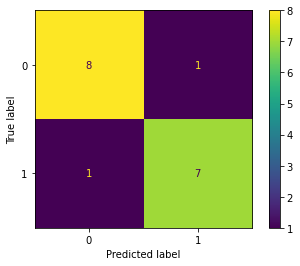

In [17]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_regressor.classes_)
disp.plot()
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



##Random Forest Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
rfc.fit(X_train,y_train)

<ipython-input-19-50118af1d7d3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [20]:
rfc.score (X_train,y_train)

1.0

In [21]:
rfc.score (X_test,y_test)

1.0

In [22]:
y_pred=rfc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[9 0]
 [0 8]]


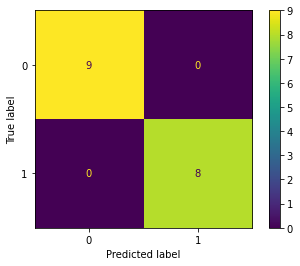

In [24]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



##Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
DT.score(X_train,y_train)

1.0

In [28]:
DT.score(X_test,y_test)

0.9411764705882353

In [29]:
y_pred=DT.predict(X_test)

In [30]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[9 0]
 [1 7]]


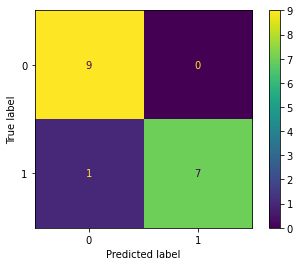

In [31]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



##Support Vector Classifier

In [33]:
from sklearn.svm import SVC
regressor=SVC(kernel='linear')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [34]:
regressor.score(X_train,y_train)

0.8970588235294118

In [35]:
regressor.score(X_test,y_test)

0.8823529411764706

In [36]:
y_pred=regressor.predict(X_test)

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8 1]
 [1 7]]


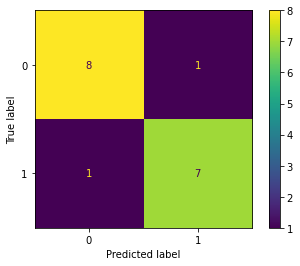

In [38]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=regressor.classes_)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



##Artificial Neural network/ MLP

In [40]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=500)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [41]:
mlp.score(X_train,y_train)

0.9411764705882353

In [42]:
mlp.score(X_test,y_test)

1.0

In [43]:
y_pred=mlp.predict(X_test)

In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[9 0]
 [0 8]]


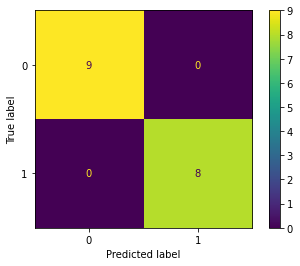

In [45]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



###*Pretty Table of the Machine Learning Models and their Scores*

In [47]:
from prettytable import PrettyTable

In [48]:
myTable=PrettyTable(["Model","Training Score","Test Score"])

In [49]:
myTable.add_row(["Logistic Regression",logistic_regressor.score(X_train,y_train),logistic_regressor.score(X_test,y_test)])
myTable.add_row(["Random Forest Classification",rfc.score(X_train,y_train),rfc.score(X_test,y_test)])
myTable.add_row(["Decision Tree Classifier",DT.score(X_train, y_train),DT.score(X_test,y_test)])
myTable.add_row(["Support Vector Classifier",regressor.score(X_train,y_train),regressor.score(X_test,y_test)])
myTable.add_row(["Artificial Neural Network/ MLP",mlp.score(X_train,y_train),mlp.score(X_test,y_test)])

In [50]:
print(myTable)

+--------------------------------+--------------------+--------------------+
|             Model              |   Training Score   |     Test Score     |
+--------------------------------+--------------------+--------------------+
|      Logistic Regression       | 0.8970588235294118 | 0.8823529411764706 |
|  Random Forest Classification  |        1.0         |        1.0         |
|    Decision Tree Classifier    |        1.0         | 0.9411764705882353 |
|   Support Vector Classifier    | 0.8970588235294118 | 0.8823529411764706 |
| Artificial Neural Network/ MLP | 0.9411764705882353 |        1.0         |
+--------------------------------+--------------------+--------------------+


Random Forest Classification model and Artificial Neural Network/ MLP model resulted in the highest test scores and therefore are best fit for the model.